<a href="https://colab.research.google.com/github/Anunineleaps6/Capstone_Sales/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install nbimporter
!pip install nbimporter

# Add the directory to the system path
import sys
sys.path.append("/content/drive/MyDrive/CAPSTONE_FINAL")

# Import nbimporter
import nbimporter

# Now, examine Capstone_sales.ipynb to find the data loading code
# and import it here.
# Assuming the data loading is done by a function or variable named 'df_sales'
# or a function that returns the dataframe, I will try to import it.
# If this is not correct, I may need to adjust based on the actual code in Capstone_sales.ipynb

try:
    # Attempt to import df_sales directly if it's defined in Capstone_sales.ipynb
    from Capstone_sales import df_sales
    print("Successfully imported df_sales from Capstone_sales.ipynb")
except ImportError:
    # If df_sales is not directly available, try to find a data loading function
    print("Could not directly import df_sales. Attempting to find and use a data loading function.")
    try:
        # Assuming a function named 'load_sales_data' exists in Capstone_sales.ipynb
        from Capstone_sales import load_sales_data
        df_sales = load_sales_data()
        print("Successfully loaded data using load_sales_data function from Capstone_sales.ipynb")
    except ImportError:
        print("Could not find a data loading function like 'load_sales_data' in Capstone_sales.ipynb.")
        df_sales = None
    except Exception as e:
        print(f"An error occurred while calling load_sales_data: {e}")
        df_sales = None


# Display the first 5 rows of the DataFrame if loading was successful
if df_sales is not None:
    display(df_sales.head())

    # Display the information of the DataFrame
    display(df_sales.info())
else:
    print("Data loading failed. Please ensure Capstone_sales.ipynb contains the necessary data loading code and that it's accessible.")

Could not directly import df_sales. Attempting to find and use a data loading function.
Could not find a data loading function like 'load_sales_data' in Capstone_sales.ipynb.
Data loading failed. Please ensure Capstone_sales.ipynb contains the necessary data loading code and that it's accessible.


**Reasoning**:
Load the data from the specified CSV file into a pandas DataFrame and display the head and info of the DataFrame.



### Subtask:
Examine Capstone_sales.ipynb content to understand data loading

In [ ]:
# Attempt to read and print the content of Capstone_sales.ipynb to understand its structure and data loading method.
try:
    with open("/content/drive/MyDrive/CAPSTONE_FINAL/Capstone_sales.ipynb", "r") as f:
        notebook_content = f.read()
    print(notebook_content)
except FileNotFoundError:
    print("Error: Capstone_sales.ipynb not found. Please ensure the path is correct.")
except Exception as e:
    print(f"An error occurred while reading the notebook file: {e}")

{"nbformat":4,"nbformat_minor":0,"metadata":{"colab":{"provenance":[{"file_id":"https://github.com/Anunineleaps6/Capstone_Sales/blob/main/Capstone_sales.ipynb","timestamp":1755583212145}]},"kernelspec":{"name":"python3","display_name":"Python 3"},"language_info":{"name":"python"}},"cells":[{"cell_type":"code","execution_count":null,"metadata":{"colab":{"base_uri":"https://localhost:8080/"},"id":"nOAxQWQvLTj-","outputId":"a36e85ec-8762-4099-bb1a-6d2c3cb36af4","executionInfo":{"status":"ok","timestamp":1755582993922,"user_tz":-330,"elapsed":4122,"user":{"displayName":"","userId":""}}},"outputs":[{"output_type":"stream","name":"stdout","text":["Requirement already satisfied: gspread in /usr/local/lib/python3.11/dist-packages (6.2.1)\n","Requirement already satisfied: oauth2client in /usr/local/lib/python3.11/dist-packages (4.1.3)\n","Requirement already satisfied: pandas in /usr/local/lib/python3.11/dist-packages (2.2.2)\n","Requirement already satisfied: numpy in /usr/local/lib/python3.1

### Subtask:
Replicate Google Sheets data loading from Capstone_sales.ipynb

In [ ]:
# Import necessary libraries for Google Sheets interaction
import gspread
from oauth2client.service_account import ServiceAccountCredentials

# Define the scope
scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]

# Authorize the client using the credentials file
# Make sure 'creds.json' is in the specified path in your Google Drive
try:
    creds = ServiceAccountCredentials.from_json_keyfile_name("/content/drive/MyDrive/CAPSTONE_FINAL/creds.json", scope)
    client = gspread.authorize(creds)
    print("Google Sheets client authorized successfully.")
except FileNotFoundError:
    print("Error: creds.json not found. Please ensure the credentials file is in the correct path.")
except Exception as e:
    print(f"An error occurred during Google Sheets authorization: {e}")
    client = None # Set client to None if authorization fails

Google Sheets client authorized successfully.


### Subtask:
Read data from the Google Sheet into a DataFrame

In [ ]:
import pandas as pd

# Check if the client was authorized successfully
if client is not None:
    try:
        # Open the spreadsheet (replace "Your Spreadsheet Name" with your actual spreadsheet name)
        spreadsheet = client.open("CRM_Capstone")

        # Select the worksheet (replace "Sheet1" with your actual sheet name)
        worksheet = spreadsheet.sheet1

        # Get all the data from the worksheet
        data = worksheet.get_all_values()

        # Convert the data to a pandas DataFrame
        # The first row is assumed to be the header
        df_sales = pd.DataFrame(data[1:], columns=data[0])

        print("Successfully loaded data from Google Sheet.")
        display(df_sales.head())
        display(df_sales.info())

    except gspread.SpreadsheetNotFound:
        print("Error: Spreadsheet not found. Please check the spreadsheet name.")
        df_sales = None
    except gspread.WorksheetNotFound:
        print("Error: Worksheet not found. Please check the worksheet name.")
        df_sales = None
    except Exception as e:
        print(f"An error occurred while reading data from Google Sheet: {e}")
        df_sales = None
else:
    print("Google Sheets client was not authorized. Cannot read data.")
    df_sales = None

Successfully loaded data from Google Sheet.


,Lead_ID,Lead_Name,Company_Name,Source,Region_ID,Rep_ID,Created_Date,Current_Stage,Email,Phone,...,Deal_Source,Company_ID,Engagement_Level,Follow_Up_Threshold,Project_Term,Budget_Tier,Country,Company_Industry,Service_Category,Deal_Status_Category
0,LDUBR-NA-001,Uber Lead,Uber,Outbound,NA,DK_NA,2025-06-26 10:14:30,Deal Won,contact_55@uber.com,-9751844629,...,Outbound,CMP_U,High,5,6-12 months,100L+,USA,Healthcare,Cloud,Deal Won
1,LDWMT-NA-002,Walmart Lead,Walmart,Outbound,NA,AS_NA,2024-12-01 8:59:11,Ongoing - Demo Completed,contact_51@walmart.com,-8383493491,...,Outbound,CMP_W,Low,10,12-24 months,20-50L,USA,Technology,Data,Ongoing - Cold
2,LDFRD-NA-003,Ford Motor Co Lead,Ford Motor Co,Outbound,NA,DK_NA,2024-10-08 14:26:45,Deal Lost,contact_4@fordmotorco.com,-6324036245,...,Outbound,CMP_FMC,Low,10,>24 months,20-50L,USA,Finance,Data,Deal Lost
3,LDAMZ-NA-004,Amazon Lead,Amazon,Outbound,NA,DK_NA,2024-08-25 0:43:27,Deal Won,contact_47@amazon.com,-728469968,...,Outbound,CMP_A,Low,7,6-12 months,100L+,USA,Technology,Marketing,Deal Won
4,LDMST-NA-005,Microsoft Lead,Microsoft,Outbound,NA,CL_NA,2024-03-26 0:18:44,Deal Lost,contact_66@microsoft.com,-9031684472,...,Outbound,CMP_M,Low,10,12-24 months,20-50L,USA,Healthcare,Cloud,Deal Lost


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Lead_ID               3000 non-null   object
 1   Lead_Name             3000 non-null   object
 2   Company_Name          3000 non-null   object
 3   Source                3000 non-null   object
 4   Region_ID             3000 non-null   object
 5   Rep_ID                3000 non-null   object
 6   Created_Date          3000 non-null   object
 7   Current_Stage         3000 non-null   object
 8   Email                 3000 non-null   object
 9   Phone                 3000 non-null   object
 10  Priority              3000 non-null   object
 11  Last_Updated          3000 non-null   object
 12  Deal_Source           3000 non-null   object
 13  Company_ID            3000 non-null   object
 14  Engagement_Level      3000 non-null   object
 15  Follow_Up_Threshold   3000 non-null   

None

### Subtask:
Perform Exploratory Data Analysis (EDA)

--- Basic Statistics ---


,Lead_ID,Lead_Name,Company_Name,Source,Region_ID,Rep_ID,Created_Date,Current_Stage,Email,Phone,...,Deal_Source,Company_ID,Engagement_Level,Follow_Up_Threshold,Project_Term,Budget_Tier,Country,Company_Industry,Service_Category,Deal_Status_Category
count,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,...,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000
unique,3000,172,172,2,6,20,3000,12,2420,3000,...,2,2963,3,4,4,3,31,15,11,4
top,LDCREA-AF-3000,DynamicConsulting Lead,DynamicConsulting,Outbound,APAC,QH_LA,2025-06-24 1:13:14,Deal Won,contact_81@globalconsulting.com,-6989778295,...,Outbound,CMP_S,High,10,12-24 months,20-50L,USA,Manufacturing,Operations,Deal Won
freq,1,60,60,2396,773,209,1,1590,4,1,...,2396,8,1019,794,779,1002,129,398,529,1590



--- Number of unique values per column ---


,0
Lead_ID,3000
Lead_Name,172
Company_Name,172
Source,2
Region_ID,6
Rep_ID,20
Created_Date,3000
Current_Stage,12
Email,2420
Phone,3000


/tmp/ipython-input-3827697879.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_sales, y='Current_Stage', order = df_sales['Current_Stage'].value_counts().index, palette='viridis')


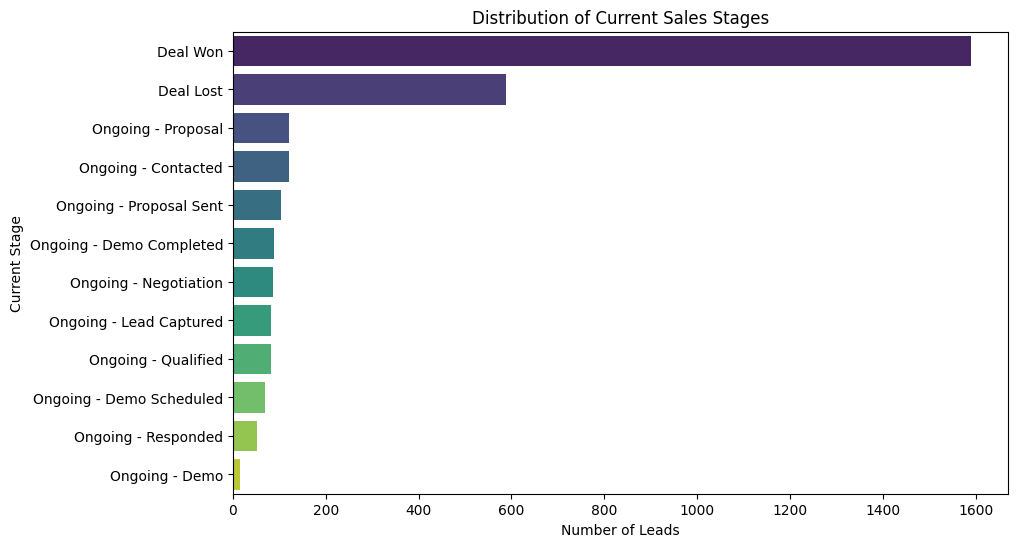

/tmp/ipython-input-3827697879.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_sales, y='Region_ID', order = df_sales['Region_ID'].value_counts().index, palette='viridis')


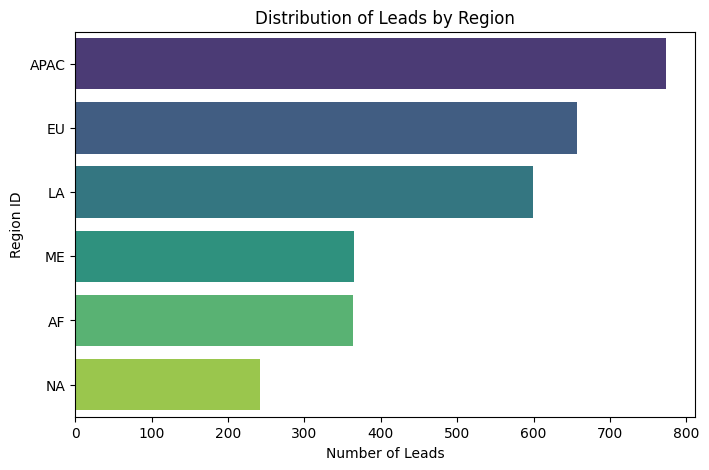

/tmp/ipython-input-3827697879.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_sales, y='Source', order = df_sales['Source'].value_counts().index, palette='viridis')


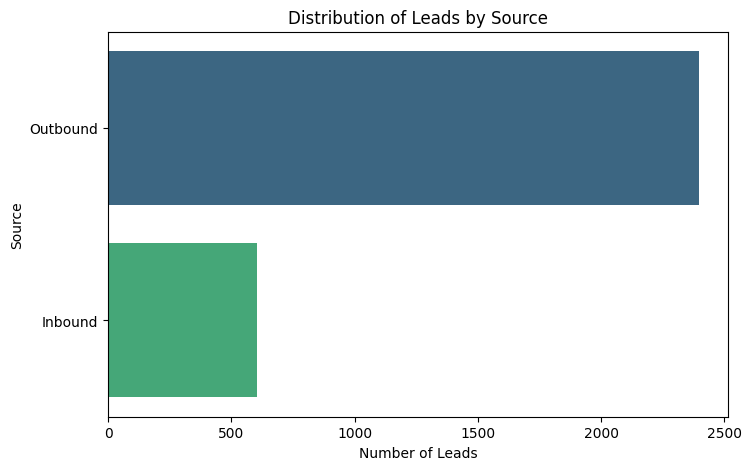


--- Funnel Analysis ---
Number of leads at each stage:


,count
Current_Stage,
Ongoing - Demo,16
Ongoing - Responded,51
Ongoing - Demo Scheduled,70
Ongoing - Qualified,82
Ongoing - Lead Captured,83
Ongoing - Negotiation,87
Ongoing - Demo Completed,88
Ongoing - Proposal Sent,104
Ongoing - Proposal,120



Conversion rate from Qualified to Deal Won: 1939.02%


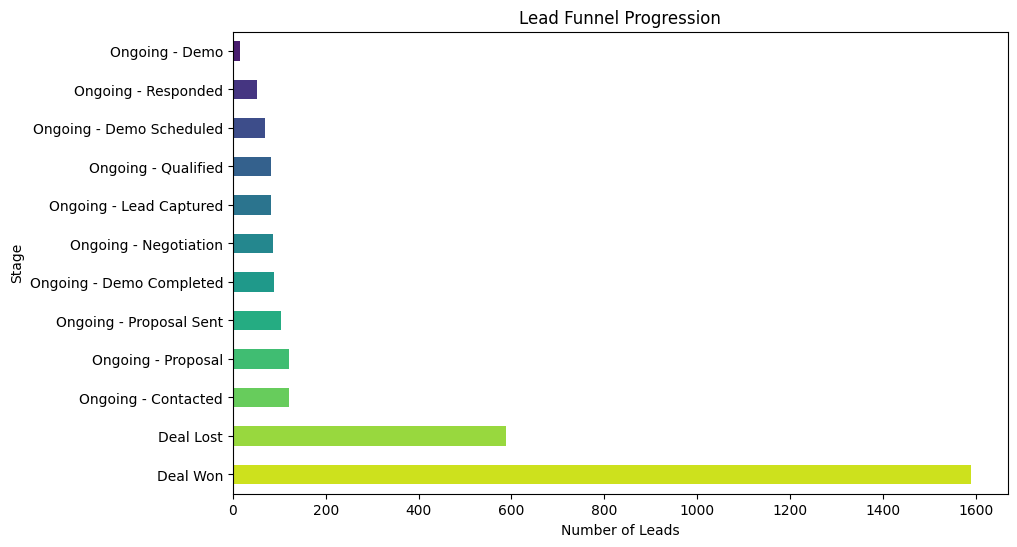


--- Segmentation Analysis ---

Conversion Rate by Region and Source (Deal Won):


Source,Inbound,Outbound
Region_ID,,
AF,61.111111,52.554745
APAC,50.980392,56.451613
EU,59.259259,51.724138
LA,44.444444,52.008457
ME,51.724138,49.837134
NA,54.761905,52.500000



--- Time-Based Patterns ---

Conversion Rate by Day of Week (Deal Won):


,Deal_Status_Category
Created_DayOfWeek,
Monday,54.225352
Tuesday,51.338200
Wednesday,52.575107
Thursday,53.734940
Friday,54.611650
Saturday,49.285714
Sunday,55.111111



Conversion Rate by Hour of Day (Deal Won):


,Deal_Status_Category
Created_Hour,
0,53.424658
1,49.166667
2,48.905109
3,58.333333
4,47.014925
5,50.000000
6,64.077670
7,47.019868
8,53.174603


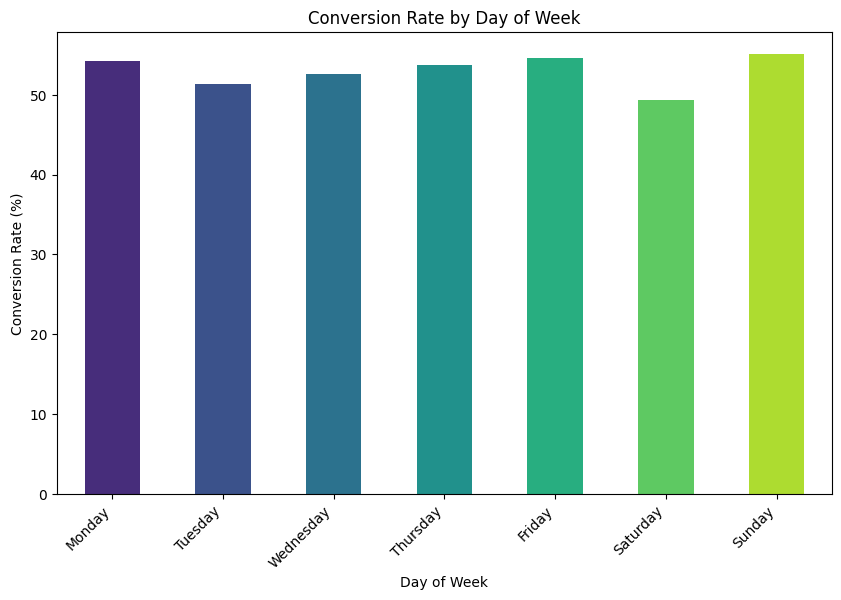

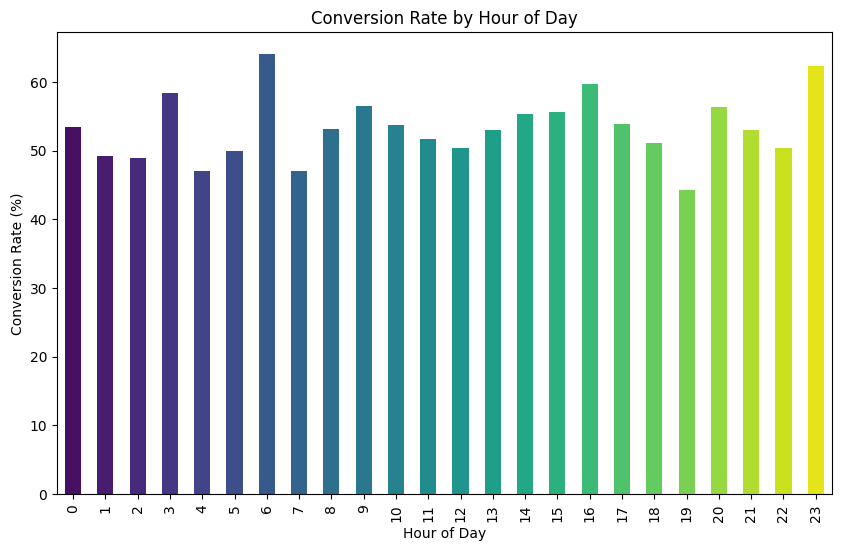


--- Lead Quality Analysis ---

Characteristics of 'Deal Won' leads:


,Lead_ID,Lead_Name,Company_Name,Source,Region_ID,Rep_ID,Created_Date,Current_Stage,Email,Phone,...,Engagement_Level,Follow_Up_Threshold,Project_Term,Budget_Tier,Country,Company_Industry,Service_Category,Deal_Status_Category,Created_DayOfWeek,Created_Hour
count,1590,1590,1590,1590,1590,1590,1590,1590,1590,1590,...,1590,1590,1590,1590,1590,1590,1590,1590,1590,1590.000000
unique,1590,131,131,2,6,20,NaN,1,1407,1590,...,3,4,4,3,31,15,11,1,7,NaN
top,LDCREA-AF-3000,AdvancedVentures Lead,AdvancedVentures,Outbound,APAC,QH_LA,NaN,Deal Won,contact_67@creativeventures.com,-6989778295,...,High,10,12-24 months,100L+,India,Manufacturing,Operations,Deal Won,Sunday,NaN
freq,1,36,36,1268,428,106,NaN,1590,3,1,...,734,426,432,569,79,197,258,1590,248,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-15 17:36:29.058490368,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.372956
min,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-19 12:18:26,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2024-02-15 21:02:35.750000128,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-16 21:33:04.500000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2025-02-11 11:19:02.249999872,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,2025-08-17 02:53:53,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000



Characteristics of 'Deal Lost' leads:


,Lead_ID,Lead_Name,Company_Name,Source,Region_ID,Rep_ID,Created_Date,Current_Stage,Email,Phone,...,Engagement_Level,Follow_Up_Threshold,Project_Term,Budget_Tier,Country,Company_Industry,Service_Category,Deal_Status_Category,Created_DayOfWeek,Created_Hour
count,589,589,589,589,589,589,589,589,589,589,...,589,589,589,589,589,589,589,589,589,589.000000
unique,589,76,76,2,6,20,NaN,1,556,589,...,2,4,4,3,31,15,11,1,7,NaN
top,LDGLOB-LA-2995,AdvancedConsulting Lead,AdvancedConsulting,Outbound,APAC,QH_LA,NaN,Deal Lost,contact_91@futureventures.com,-5103530403,...,Low,10,12-24 months,20-50L,Australia,Manufacturing,Operations,Deal Lost,Wednesday,NaN
freq,1,14,14,477,149,51,NaN,589,2,1,...,457,157,158,260,30,93,103,589,94,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-21 09:19:59.137521152,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.016978
min,NaN,NaN,NaN,NaN,NaN,NaN,2023-08-21 12:42:20,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2024-02-29 21:47:09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-24 10:23:09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2025-02-17 12:34:55,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,2025-08-17 16:04:50,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000



Distribution of 'Source' for 'Deal Won' vs 'Deal Lost':


,Deal Won (%),Deal Lost (%)
Source,,
Outbound,79.748428,80.98472
Inbound,20.251572,19.01528


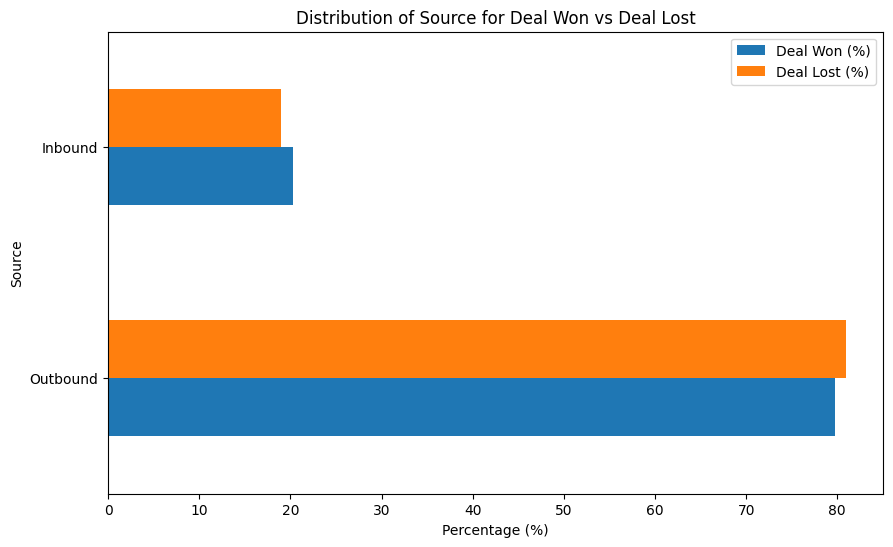


Distribution of 'Region_ID' for 'Deal Won' vs 'Deal Lost':


,Deal Won (%),Deal Lost (%)
Region_ID,,
AF,12.515723,11.714771
APAC,26.918239,25.297114
EU,22.012579,19.524618
LA,18.993711,20.713073
ME,11.509434,13.412564
NA,8.050314,9.337861


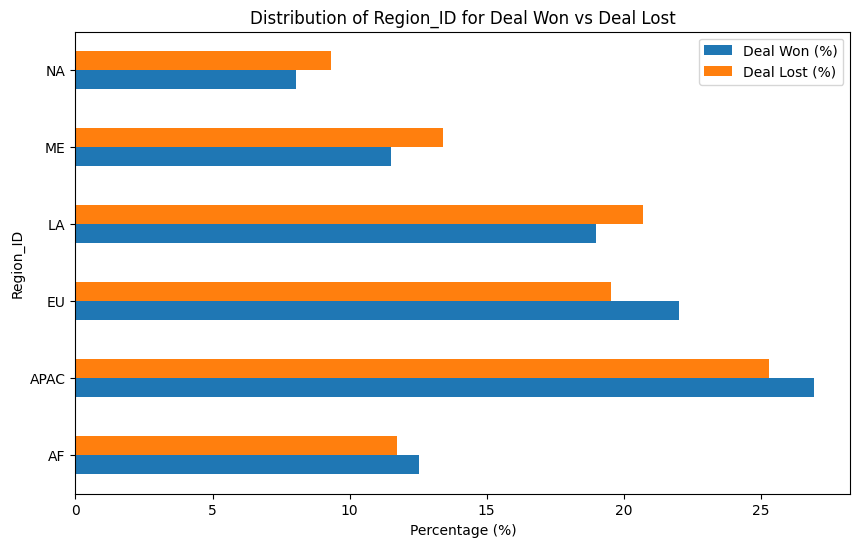


Distribution of 'Engagement_Level' for 'Deal Won' vs 'Deal Lost':


,Deal Won (%),Deal Lost (%)
Engagement_Level,,
High,46.163522,0.000000
Low,17.106918,77.589134
Medium,36.729560,22.410866


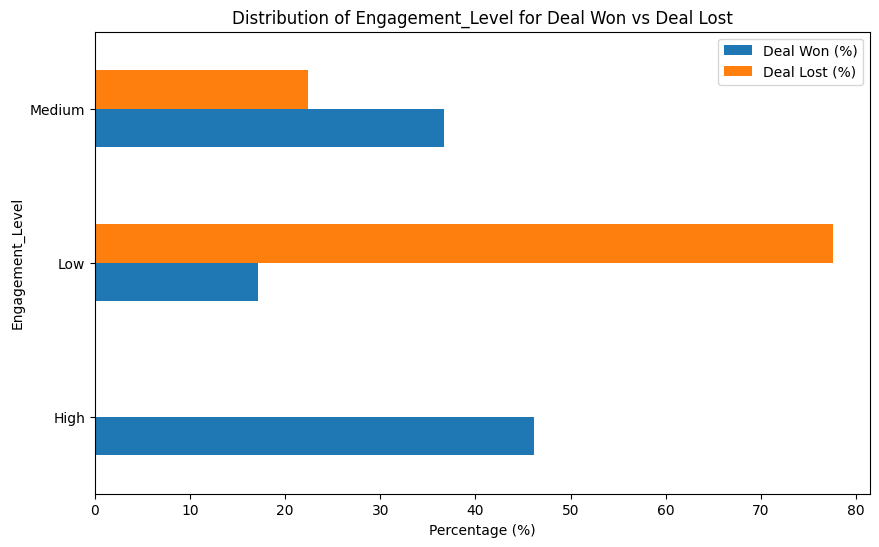


Distribution of 'Project_Term' for 'Deal Won' vs 'Deal Lost':


,Deal Won (%),Deal Lost (%)
Project_Term,,
0-6 months,24.150943,25.806452
12-24 months,27.169811,26.825127
6-12 months,24.402516,24.108659
>24 months,24.276730,23.259762



Distribution of 'Budget_Tier' for 'Deal Won' vs 'Deal Lost':


,Deal Won (%),Deal Lost (%)
Budget_Tier,,
100L+,35.786164,28.862479
20-50L,30.125786,44.142615
50-100L,34.088050,26.994907


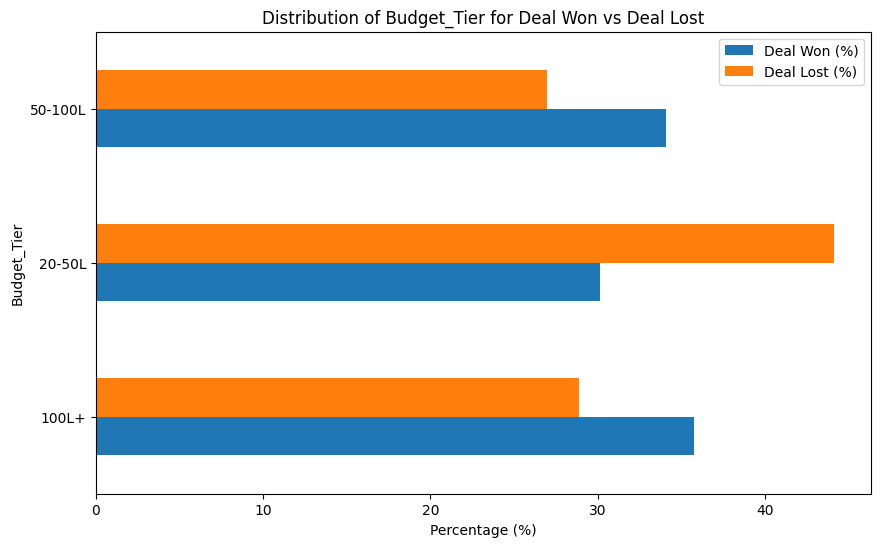


Distribution of 'Country' for 'Deal Won' vs 'Deal Lost':


,Deal Won (%),Deal Lost (%)
Country,,
Argentina,2.830189,3.225806
Australia,3.773585,5.093379
Bahrain,2.578616,2.886248
Brazil,2.893082,2.546689
Canada,3.710692,4.753820
Chile,3.333333,2.716469
China,2.704403,3.056027
Colombia,3.522013,4.244482
France,2.704403,2.546689



Distribution of 'Company_Industry' for 'Deal Won' vs 'Deal Lost':


,Deal Won (%),Deal Lost (%)
Company_Industry,,
Agriculture,6.981132,5.263158
Automotive,5.786164,4.753820
Banking,9.245283,8.998302
Consulting,5.220126,4.753820
E-Commerce,5.911950,6.791171
Energy,10.188679,12.393888
Finance,11.761006,10.696095
Healthcare,2.389937,3.056027
Manufacturing,12.389937,15.789474



Distribution of 'Service_Category' for 'Deal Won' vs 'Deal Lost':


,Deal Won (%),Deal Lost (%)
Service_Category,,
AI,9.811321,7.809847
Cloud,2.452830,2.716469
Consulting,12.955975,11.884550
Data,8.867925,9.677419
Engineering,8.113208,6.791171
Logistics,9.685535,10.526316
Marketing,2.264151,3.904924
Operations,16.226415,17.487267
Service,6.477987,5.093379


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df_sales' is already loaded and available from previous steps

# --- Basic EDA ---
print("--- Basic Statistics ---")
display(df_sales.describe(include='all'))

print("\n--- Number of unique values per column ---")
display(df_sales.nunique())

# Visualize the distribution of 'Current_Stage'
plt.figure(figsize=(10, 6))
sns.countplot(data=df_sales, y='Current_Stage', order = df_sales['Current_Stage'].value_counts().index, palette='viridis')
plt.title('Distribution of Current Sales Stages')
plt.xlabel('Number of Leads')
plt.ylabel('Current Stage')
plt.show()

# Visualize the distribution of 'Region_ID'
plt.figure(figsize=(8, 5))
sns.countplot(data=df_sales, y='Region_ID', order = df_sales['Region_ID'].value_counts().index, palette='viridis')
plt.title('Distribution of Leads by Region')
plt.xlabel('Number of Leads')
plt.ylabel('Region ID')
plt.show()

# Visualize the distribution of 'Source'
plt.figure(figsize=(8, 5))
sns.countplot(data=df_sales, y='Source', order = df_sales['Source'].value_counts().index, palette='viridis')
plt.title('Distribution of Leads by Source')
plt.xlabel('Number of Leads')
plt.ylabel('Source')
plt.show()

# --- Funnel Analysis ---
print("\n--- Funnel Analysis ---")
# Convert 'Created_Date' and 'Last_Updated' to datetime objects
df_sales['Created_Date'] = pd.to_datetime(df_sales['Created_Date'])
df_sales['Last_Updated'] = pd.to_datetime(df_sales['Last_Updated'])

# Define the stages in the funnel (adjust as per your 'Current_Stage' values)
funnel_stages = ['Ongoing - Demo', 'Ongoing - Responded', 'Ongoing - Demo Scheduled', 'Ongoing - Qualified',
                 'Ongoing - Lead Captured', 'Ongoing - Negotiation', 'Ongoing - Demo Completed',
                 'Ongoing - Proposal Sent', 'Ongoing - Proposal', 'Ongoing - Contacted', 'Deal Lost', 'Deal Won']

# Calculate the number of leads at each stage
funnel_counts = df_sales['Current_Stage'].value_counts().reindex(funnel_stages)
print("Number of leads at each stage:")
display(funnel_counts)

# Calculate conversion rate between stages (example: from Qualified to Deal Won)
# You can define specific conversion points based on your funnel definition
qualified_leads = funnel_counts.get('Ongoing - Qualified', 0)
deal_won_leads = funnel_counts.get('Deal Won', 0)
conversion_rate_qualified_to_won = (deal_won_leads / qualified_leads) * 100 if qualified_leads > 0 else 0
print(f"\nConversion rate from Qualified to Deal Won: {conversion_rate_qualified_to_won:.2f}%")

# Visualize the funnel stages
plt.figure(figsize=(10, 6))
funnel_counts.plot(kind='barh', color=sns.color_palette("viridis", len(funnel_stages)))
plt.title('Lead Funnel Progression')
plt.xlabel('Number of Leads')
plt.ylabel('Stage')
plt.gca().invert_yaxis() # Display stages from top to bottom
plt.show()


# --- Segmentation ---
print("\n--- Segmentation Analysis ---")

# Segmentation by Region and Source
print("\nConversion Rate by Region and Source (Deal Won):")
conversion_by_segment = df_sales.groupby(['Region_ID', 'Source'])['Deal_Status_Category'].apply(lambda x: (x == 'Deal Won').sum() / len(x) * 100).unstack()
display(conversion_by_segment)

# You can add more segmentation here (e.g., by Company_Industry, Service_Category)


# --- Time-Based Patterns ---
print("\n--- Time-Based Patterns ---")

# Extract Day of Week and Hour from Created_Date
df_sales['Created_DayOfWeek'] = df_sales['Created_Date'].dt.day_name()
df_sales['Created_Hour'] = df_sales['Created_Date'].dt.hour

# Conversion Rate by Day of Week (Deal Won)
print("\nConversion Rate by Day of Week (Deal Won):")
conversion_by_dayofweek = df_sales.groupby('Created_DayOfWeek')['Deal_Status_Category'].apply(lambda x: (x == 'Deal Won').sum() / len(x) * 100).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
display(conversion_by_dayofweek)

# Conversion Rate by Hour of Day (Deal Won)
print("\nConversion Rate by Hour of Day (Deal Won):")
conversion_by_hour = df_sales.groupby('Created_Hour')['Deal_Status_Category'].apply(lambda x: (x == 'Deal Won').sum() / len(x) * 100)
display(conversion_by_hour)

# Visualize Conversion Rate by Day of Week
plt.figure(figsize=(10, 6))
conversion_by_dayofweek.plot(kind='bar', color=sns.color_palette('viridis', len(conversion_by_dayofweek)))
plt.title('Conversion Rate by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Visualize Conversion Rate by Hour of Day
plt.figure(figsize=(10, 6))
conversion_by_hour.plot(kind='bar', color=sns.color_palette('viridis', len(conversion_by_hour)))
plt.title('Conversion Rate by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Conversion Rate (%)')
plt.show()


# --- Lead Quality ---
print("\n--- Lead Quality Analysis ---")

# Compare characteristics of 'Deal Won' vs 'Deal Lost' leads
deal_won_df = df_sales[df_sales['Deal_Status_Category'] == 'Deal Won']
deal_lost_df = df_sales[df_sales['Deal_Status_Category'] == 'Deal Lost']

print("\nCharacteristics of 'Deal Won' leads:")
display(deal_won_df.describe(include='all'))

print("\nCharacteristics of 'Deal Lost' leads:")
display(deal_lost_df.describe(include='all'))

# Compare distributions of categorical features for 'Deal Won' vs 'Deal Lost'
categorical_cols = ['Source', 'Region_ID', 'Engagement_Level', 'Project_Term', 'Budget_Tier', 'Country', 'Company_Industry', 'Service_Category']

for col in categorical_cols:
    print(f"\nDistribution of '{col}' for 'Deal Won' vs 'Deal Lost':")
    deal_won_dist = deal_won_df[col].value_counts(normalize=True) * 100
    deal_lost_dist = deal_lost_df[col].value_counts(normalize=True) * 100
    comparison_df = pd.DataFrame({'Deal Won (%)': deal_won_dist, 'Deal Lost (%)': deal_lost_dist}).fillna(0)
    display(comparison_df)

    # Visualize the comparison for key categorical columns
    if col in ['Source', 'Region_ID', 'Engagement_Level', 'Budget_Tier']:
        comparison_df.plot(kind='barh', figsize=(10, 6))
        plt.title(f'Distribution of {col} for Deal Won vs Deal Lost')
        plt.xlabel('Percentage (%)')
        plt.ylabel(col)
        plt.show()

### Subtask:
Calculate key funnel KPIs